#### Reads small portion of tfRecord and displays them

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Import system helpers
import os
import pathlib
from os import listdir
from os.path import isfile, join

# Import TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import helper libraries
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import IPython.display as display
from PIL import Image

In [24]:
def read_record(tfrecord='images.tfrecords'):
  raw_image_dataset = tf.data.TFRecordDataset(tfrecord)

  # Create a dictionary describing the features.
  image_feature_description = {
      'mnfr_label': tf.io.FixedLenFeature([], tf.string),
      'year_label': tf.io.FixedLenFeature([], tf.string),
      'full_label': tf.io.FixedLenFeature([], tf.string),
      'image_raw': tf.io.FixedLenFeature([], tf.string),
      'bbox': tf.io.FixedLenFeature([4,], tf.float32),
  }
  def _parse_image_function(example_proto):
      # Parse the input tf.Example proto using the dictionary above.
      return tf.io.parse_single_example(example_proto, image_feature_description)

  parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
  return parsed_image_dataset

In [25]:
ds = read_record(tfrecord='images.tfrecords')

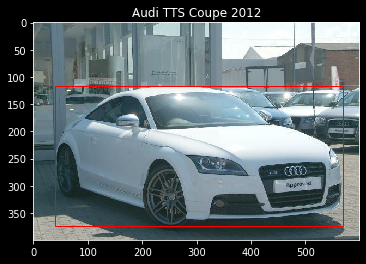

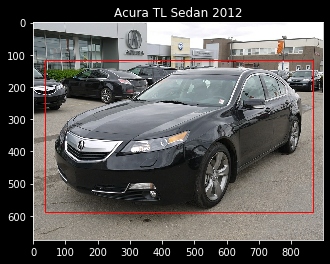

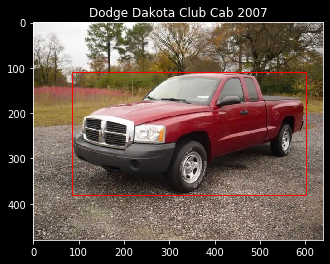

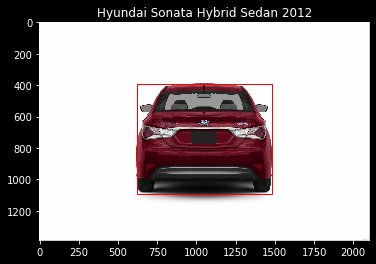

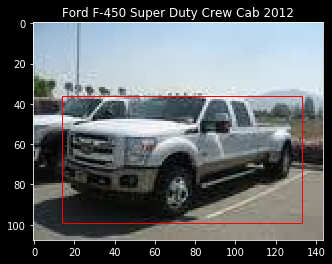

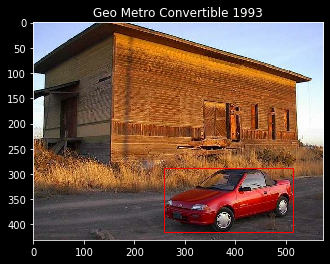

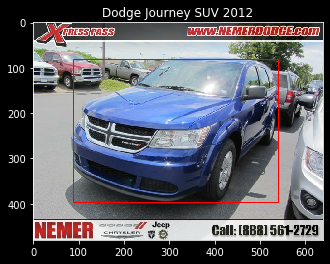

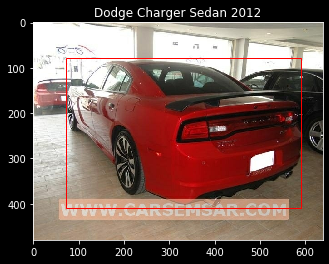

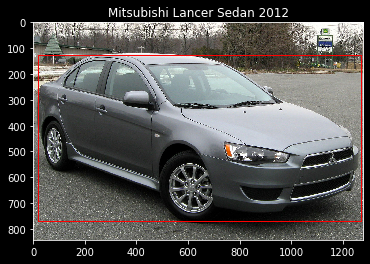

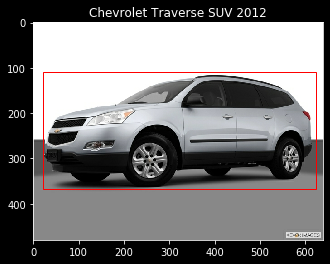

In [40]:
for features in ds.take(10):
    image = tf.image.decode_image(features['image_raw'], channels=3)
    #plt.imshow(image.numpy())
    bbox = features['bbox'].numpy()
    #print(bb_x1,features['bb_x2'].numpy(), bb_y1,features['bb_y2'].numpy())
    fig,ax = plt.subplots(1)
    ax.imshow(image.numpy())
    rect = patches.Rectangle((bbox[1],bbox[0]),bbox[3]-bbox[1],bbox[2]-bbox[0],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.title(features['full_label'].numpy().decode())
    plt.show()

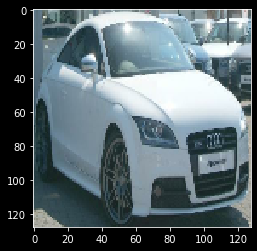

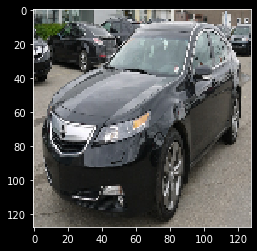

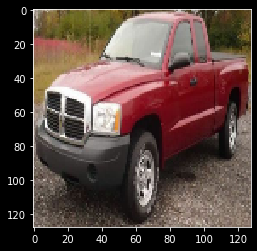

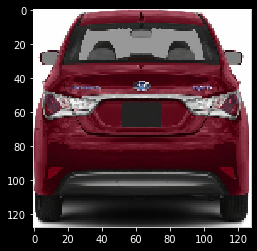

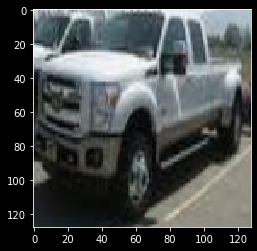

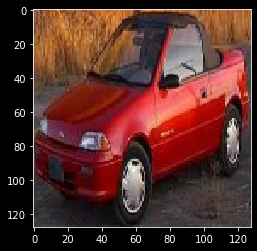

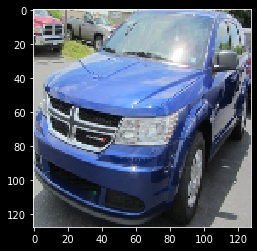

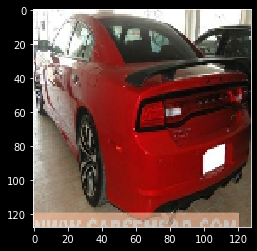

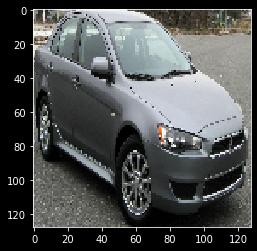

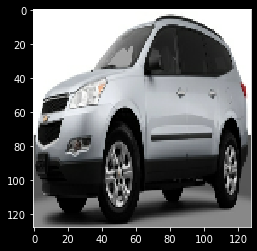

In [34]:
for features in ds.take(10):
    image = tf.image.decode_image(features['image_raw'], channels=3)
    H, W, _ = image.shape
    bbox = features['bbox']
    cropped = tf.image.crop_and_resize(
        [image],
        [[bbox[0]/H, bbox[1]/W, bbox[2]/H, bbox[3]/W]],
        [0,],
        [224, 224])
    fig,ax = plt.subplots(1)
    ax.imshow(np.squeeze(cropped.numpy()) / 255.0)
    plt.show()

NameError: name 'label_sets' is not defined